In [8]:
import pandas as pd
import matplotlib.pyplot as mlt
import numpy as np
import seaborn as sns

In [10]:
df=pd.read_csv("bike_dataset.csv")

In [11]:
df

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0
...,...,...,...,...,...,...,...,...,...
356,Aprilia RSV4,2369000,1099.0,12.0,Petrol Bike,202,https://www.carandbike.com/aprilia-bikes/rsv4,NaN,NaN
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,Petrol Bike,228,https://www.carandbike.com/harley-davidson-bik...,NaN,NaN
358,Suzuki Hayabusa,1640000,1340.0,11.0,Petrol Bike,266,https://www.carandbike.com/suzuki-bikes/hayabusa,NaN,NaN
359,Ducati Hypermotard 950,1402278,937.0,9.0,Petrol Bike,176,https://www.carandbike.com/ducati-bikes/hyperm...,NaN,NaN


In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [34]:
df.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [35]:
df.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


In [36]:
df.CC

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
356    1099.0
357    1252.0
358    1340.0
359     937.0
360    1923.0
Name: CC, Length: 361, dtype: float64

In [58]:
df['CC'].mean()

680.9736842105264

In [60]:
df['CC'] = df['CC'].apply(lambda x: df['CC'].mean() if pd.isnull(x) else x)

In [68]:
df['CC']=df['CC'].astype(int)

In [69]:
df.CC

0       680
1       680
2       680
3       680
4       680
       ... 
356    1099
357    1252
358    1340
359     937
360    1923
Name: CC, Length: 361, dtype: int32

In [70]:
df.isnull().sum()

model_name              0
price                   0
CC                      0
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [71]:
df

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,680,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,680,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,680,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,680,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,680,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0
...,...,...,...,...,...,...,...,...,...
356,Aprilia RSV4,2369000,1099,12.0,Petrol Bike,202,https://www.carandbike.com/aprilia-bikes/rsv4,NaN,NaN
357,Harley-Davidson Sportster S,1551000,1252,11.8,Petrol Bike,228,https://www.carandbike.com/harley-davidson-bik...,NaN,NaN
358,Suzuki Hayabusa,1640000,1340,11.0,Petrol Bike,266,https://www.carandbike.com/suzuki-bikes/hayabusa,NaN,NaN
359,Ducati Hypermotard 950,1402278,937,9.0,Petrol Bike,176,https://www.carandbike.com/ducati-bikes/hyperm...,NaN,NaN


In [72]:
df['acceleration_speed']

0      4.2
1      3.6
2      NaN
3      3.0
4      2.9
      ... 
356    NaN
357    NaN
358    NaN
359    NaN
360    NaN
Name: acceleration_speed, Length: 361, dtype: float64

In [73]:
df['acceleration_speed'].median()

3.215

In [74]:
df['acceleration_speed'] = df['acceleration_speed'].apply(lambda x: df['acceleration_speed'].median() if pd.isnull(x) else x)

In [75]:
df['acceleration_speed']

0      4.200
1      3.600
2      3.215
3      3.000
4      2.900
       ...  
356    3.215
357    3.215
358    3.215
359    3.215
360    3.215
Name: acceleration_speed, Length: 361, dtype: float64

In [76]:
df.isnull().sum()

model_name              0
price                   0
CC                      0
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed      0
top_speed             161
dtype: int64

In [80]:
mean_speed=df['top_speed'].mean()

In [82]:
mean_speed

99.33865

In [81]:
df['top_speed'] = df['top_speed'].apply(lambda x: mean_speed if pd.isnull(x) else x)

In [83]:
df['top_speed']

0       70.00000
1      100.00000
2       25.00000
3      100.00000
4      116.00000
         ...    
356     99.33865
357     99.33865
358     99.33865
359     99.33865
360     99.33865
Name: top_speed, Length: 361, dtype: float64

In [88]:
df['top_speed']=df['top_speed'].astype(int)

In [89]:
df['top_speed']

0       70
1      100
2       25
3      100
4      116
      ... 
356     99
357     99
358     99
359     99
360     99
Name: top_speed, Length: 361, dtype: int32

In [90]:
df.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  361 non-null    int32  
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  361 non-null    float64
 8   top_speed           361 non-null    int32  
dtypes: float64(2), int32(2), int64(2), object(3)
memory usage: 22.7+ KB


In [21]:
df.sort_values(by='price',inplace=True)

In [101]:
df.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
44,Polarity Executive,38000,680,80.0,Electric Bike,55,https://www.carandbike.com/polarity-bikes/exec...,3.215,40
108,Ampere V48,38719,680,45.0,Electric Bike,84,https://www.carandbike.com/ampere-bikes/v48,3.215,25
87,Evolet Pony,39499,680,55.0,Electric Bike,82,https://www.carandbike.com/evolet-bikes/pony,3.215,25
45,Polarity Sport,40000,680,80.0,Electric Bike,55,https://www.carandbike.com/polarity-bikes/sport,3.215,45
34,Bajaj CT 100,40794,102,89.5,Petrol Bike,114,https://www.carandbike.com/bajaj-bikes/ct-100,3.300,90


In [102]:
df.tail()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
310,BMW M 1000 RR,4200000,999,15.4,Petrol Bike,192,https://www.carandbike.com/bmw-bikes/m-1000-rr,3.215,99
337,Indian Roadmaster Elite,4800000,1811,15.0,Petrol Bike,433,https://www.carandbike.com/indian-bikes/roadma...,3.215,99
360,Harley-Davidson CVO Limited,4999000,1923,8.0,Petrol Bike,411,https://www.carandbike.com/harley-davidson-bik...,3.215,99
338,Ducati 1299 Panigale,5182000,1285,15.0,Petrol Bike,190,https://www.carandbike.com/ducati-bikes/1299-p...,3.215,99
339,Kawasaki Ninja H2R,7990000,998,15.0,Petrol Bike,216,https://www.carandbike.com/kawasaki-bikes/ninj...,3.215,99


# Business Statement:

## Analysis of sales and pricing strategy in the motorcycle and electric bike market by analyzing key factors such as price, performance metrics, and customer demand for different types of bikes.

## 1. Distribution of Bike Prices

### A histogram of the price column shows how prices are distributed.

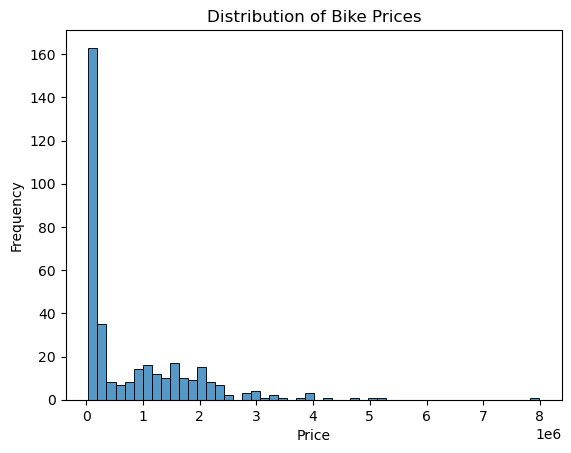

In [46]:
sns.histplot(df.price,bins=50)
mlt.title('Distribution of Bike Prices')
mlt.xlabel('Price')
mlt.ylabel('Frequency')
mlt.show()

## 2. Distribution of Bike CC

### A displot to show how the bikes are been distributed according to its CC.

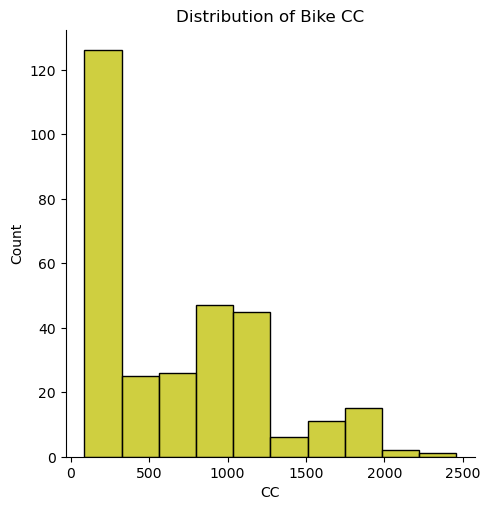

In [77]:
sns.displot(df.CC, color='y')
mlt.title('Distribution of Bike CC')
mlt.show()

## 3. Distribution according to Mileage of the bike

### A kedplot to showcase the distribution of bikes according to its mileage.

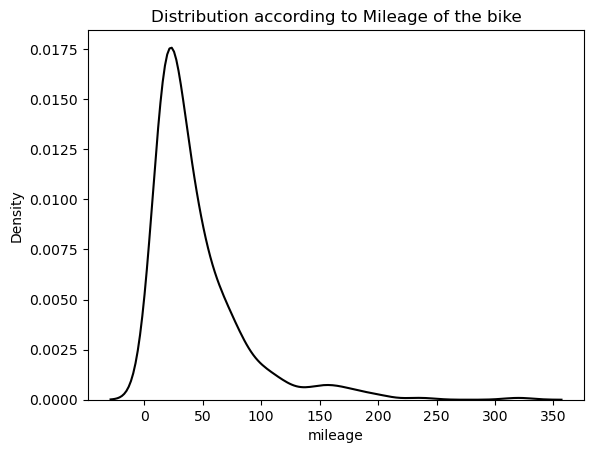

In [79]:
sns.kdeplot(df.mileage, color='k')
mlt.title('Distribution according to Mileage of the bike')
mlt.show()

## 4. Distribution based on bike type

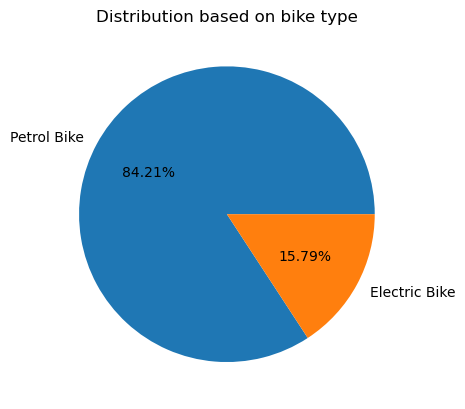

In [80]:
mlt.pie(df.type_of_bike.value_counts(),labels=df.type_of_bike.value_counts().index,autopct="%.2f%%")
mlt.title('Distribution based on bike type')
mlt.show()

## 5. Distribution according to the weight of the bike

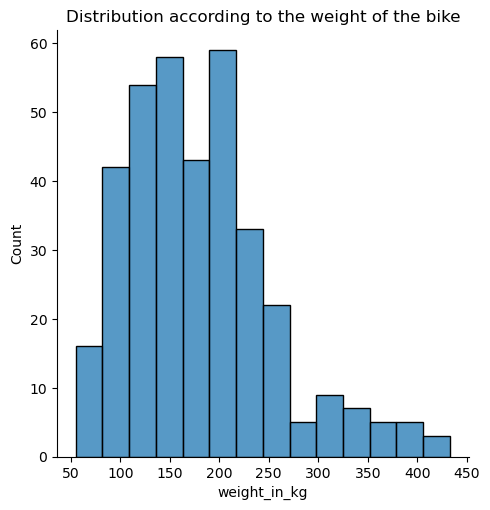

In [82]:
sns.displot(df.weight_in_kg)
mlt.title('Distribution according to the weight of the bike')
mlt.show()

## 6. Top Speed vs. Price

### A scatter plot to see if there’s a correlation between top_speed and price.

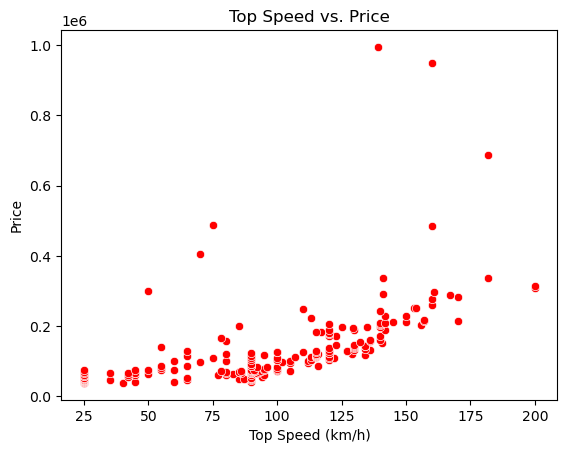

In [60]:
sns.scatterplot(data=df,x=df.top_speed,y=df.price,color='r')
mlt.title('Top Speed vs. Price')
mlt.xlabel('Top Speed (km/h)')
mlt.ylabel('Price')
mlt.show()

## 7. Acceleration Speed Distribution by Bike Type

### violinplot to show the distribution of acceleration_speed for each type_of_bike.

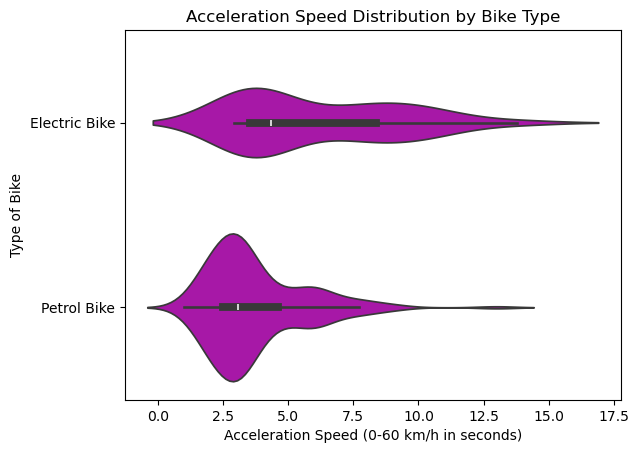

In [64]:
sns.violinplot(df,x=df.acceleration_speed,y=df.type_of_bike,color='m')
mlt.title('Acceleration Speed Distribution by Bike Type')
mlt.ylabel('Type of Bike')
mlt.xlabel('Acceleration Speed (0-60 km/h in seconds)')
mlt.show()

## 8. Mileage distribution by weight_in _kg

### relplot to show the distribution of mileage according to the weight of the bike.

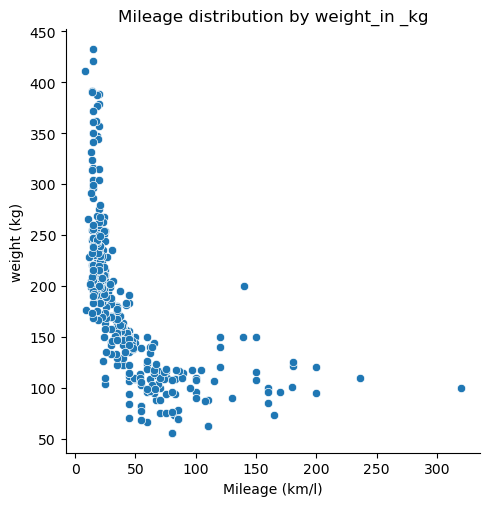

In [84]:
sns.relplot(df,x=df.mileage,y=df.weight_in_kg)
mlt.title('Mileage distribution by weight_in _kg')
mlt.xlabel('Mileage (km/l)')
mlt.ylabel('weight (kg)')
mlt.show()

## Conclusion
### The bike dataset reveals clear segments within the market based on performance metrics, price, and bike type. Higher-priced bikes generally offer better top speeds, appealing to performance-driven customers, while electric bikes excel in mileage, attracting eco-conscious commuters. Weight and mileage trends further suggest that lighter bikes suit city commuters, whereas heavier models may cater to performance and off-road enthusiasts. Leveraging these insights can help refine product offerings and target marketing efforts effectively, aligning with customer preferences across diverse segments.